#Hardware specs

##Disk Info

In [ ]:
# !df -h

##CPU Specs

In [ ]:
# !cat /proc/cpuinfo

##GPU specs

In [ ]:
!nvidia-smi

Tue May 25 17:38:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Preparation

In [ ]:
# set random seed
import numpy as np

np.random.seed(5329)

## load and process dataset

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = '1243XACf-GxdGc4GV__MY-BWWV3a7xK5I'  # Restricted shared link

downloaded = drive.CreateFile({'id':link}) 
downloaded.GetContentFile('2021s1comp5329assignment2.zip')

!unzip 2021s1comp5329assignment2.zip

Streaming output truncated to the last 5000 lines.
  inflating: COMP5329S1A2Dataset/data/550.jpg  
  inflating: COMP5329S1A2Dataset/data/5500.jpg  
  inflating: COMP5329S1A2Dataset/data/5501.jpg  
  inflating: COMP5329S1A2Dataset/data/5502.jpg  
  inflating: COMP5329S1A2Dataset/data/5503.jpg  
  inflating: COMP5329S1A2Dataset/data/5504.jpg  
  inflating: COMP5329S1A2Dataset/data/5505.jpg  
  inflating: COMP5329S1A2Dataset/data/5506.jpg  
  inflating: COMP5329S1A2Dataset/data/5507.jpg  
  inflating: COMP5329S1A2Dataset/data/5508.jpg  
  inflating: COMP5329S1A2Dataset/data/5509.jpg  
  inflating: COMP5329S1A2Dataset/data/551.jpg  
  inflating: COMP5329S1A2Dataset/data/5510.jpg  
  inflating: COMP5329S1A2Dataset/data/5511.jpg  
  inflating: COMP5329S1A2Dataset/data/5512.jpg  
  inflating: COMP5329S1A2Dataset/data/5513.jpg  
  inflating: COMP5329S1A2Dataset/data/5514.jpg  
  inflating: COMP5329S1A2Dataset/data/5515.jpg  
  inflating: COMP5329S1A2Dataset/data/5516.jpg  
  inflating: COMP532

In [ ]:
import re
import pandas as pd
from io import StringIO
FILENAME_TRAIN = '/content/COMP5329S1A2Dataset/train.csv'
FILENAME_TEST = '/content/COMP5329S1A2Dataset/test.csv'

## deal with lines cannot be read

In [ ]:
with open(FILENAME_TRAIN) as fp:
    # read a list of lines into data
    data = fp.readlines()

data[4790] = data[4790].replace("/", "")
data[14716] = data[14716].replace("/", "")
data[14961] = data[14961].replace("/", "")
data[29895] = data[29895].replace("/", "")

# and write everything back
with open(FILENAME_TRAIN, 'w') as file:
    file.writelines(data)

## load data to dataframe

In [ ]:
with open(FILENAME_TRAIN) as file:
    lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
    df_train_origin = pd.read_csv(StringIO(''.join(lines)), escapechar="/")
with open(FILENAME_TEST) as file:
    lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
    df_test = pd.read_csv(StringIO(''.join(lines)), escapechar="/")

## remove all "

In [ ]:
df_train_origin = df_train_origin.drop(columns = 'Caption').join(df_train_origin['Caption'].str.replace('\"', ''))
df_test = df_test.drop(columns = 'Caption').join(df_test['Caption'].str.replace('\"', ''))

## split into train set and validation set

In [ ]:
df_train = df_train_origin
df_val = df_train[24000:] # 6000 samples for evaluation
df_train = df_train[:24000] # 24000 samples for train

In [ ]:
# save splitted train file
df_train.to_csv("/content/COMP5329S1A2Dataset/train_split.csv", index=False)
df_train

ImageID    Labels                                            Caption
0          0.jpg         1   Woman in swim suit holding parasol on sunny day.
1          1.jpg      1 19  A couple of men riding horses on top of a gree...
2          2.jpg         1  They are brave for riding in the jungle on tho...
3          3.jpg    8 3 13  a black and silver clock tower at an intersect...
4          4.jpg     8 3 7   A train coming to a stop on the tracks out side.
...          ...       ...                                                ...
23995  23995.jpg         1  A group of people floating on top of waves in ...
23996  23996.jpg         1  A man wearing an orange tie and a woman wearin...
23997  23997.jpg  1 10 3 6      A large sign is lit up on a dark city street.
23998  23998.jpg      1 15   children learning to play tennis on a clay court
23999  23999.jpg     1 3 6  Cars, cabs and buses driving through a busy to...

[24000 rows x 3 columns]

In [ ]:
# save splitted val file
df_val.to_csv("/content/COMP5329S1A2Dataset/val_split.csv", index=False)
df_val

ImageID Labels                                            Caption
24000  24000.jpg      1  A young girl walking on a road carrying an umb...
24001  24001.jpg      1  A woman with a large black purse holding an um...
24002  24002.jpg      1    Two kids play over a soccer ball during a game.
24003  24003.jpg      1      A man standing and cutting food at a counter.
24004  24004.jpg      5   A plane is at the airport preparing to take off.
...          ...    ...                                                ...
29995  29995.jpg  8 1 2  A picture of a truck that is in the middle of ...
29996  29996.jpg      1  A plate topped with a pizza being cut with a s...
29997  29997.jpg      1          A man riding a snowboard on top of  snow.
29998  29998.jpg      1   This photo shows people skiing in the mountains.
29999  29999.jpg      1  Two young men playing soccer and fighting for ...

[6000 rows x 3 columns]

## get label information

In [ ]:
# Label distribution
import matplotlib.pyplot as plt
label_list = []

for i in df_train_origin['Labels']:
    label_list.extend(i.split())
label_list = sorted([int(i) for i in label_list])
label_list = [str(i) for i in label_list]

plt.style.use('ggplot')
plt.title("Label distribution")
plt.hist(label_list, bins=18)
plt.show()

In [ ]:
# create a label set
label_set = set(label_list)
label_set = sorted([int(i) for i in label_set])
label_set

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
# number of class
N_CLASS = len(label_set)
N_CLASS

18

# OOP Classes and Functions

In [ ]:
# dependency
import os
import time
import numpy as np
from PIL import Image
from torch.utils.data.dataset import Dataset
from tqdm import tqdm
from torchvision import transforms
from torchvision import models
import torch
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import precision_score, recall_score, f1_score
from torch import nn
from torch.utils.data.dataloader import DataLoader
from matplotlib import pyplot as plt
from numpy import printoptions
import requests
import tarfile
import random
import json
from shutil import copyfile
!pip install ipython-autotime
%load_ext autotime

time: 162 µs (started: 2021-05-25 17:39:52 +00:00)


In [ ]:
# Fix all seeds to make experiments reproducible
torch.manual_seed(2020)
torch.cuda.manual_seed(2020)
np.random.seed(2020)
random.seed(2020)
torch.backends.cudnn.deterministic = True

time: 6.1 ms (started: 2021-05-25 17:39:52 +00:00)


## EfficientNet

In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-cp37-none-any.whl size=16443 sha256=d9e4a2d3977f8c10a96e63e8d92e6c95d3818a5ae9fe861ed6af7ff49fbaa81c
  Stored in directory: /root/.cache/pip/wheels/84/27/aa/c46d23c4e8cc72d41283862b1437e0b3ad318417e8ed7d5921
Successfully built efficientnet-pytorch
time: 3.77 s (started: 2021-05-25 17:39:52 +00:00)


In [ ]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b4')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b4-6ed6700e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b4-6ed6700e.pth



Loaded pretrained weights for efficientnet-b4
time: 5.43 s (started: 2021-05-25 17:39:56 +00:00)


In [ ]:
model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        48, 12, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        12, 48, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        48, 24, kernel_siz

time: 7 ms (started: 2021-05-25 17:40:02 +00:00)


In [ ]:
# Use the torchvision's implementation of ResNeXt, but add FC layer for a different number of classes (27) and a Sigmoid instead of a default Softmax.
class EffNet(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        EN = EfficientNet.from_pretrained('efficientnet-b4')
        EN._fc = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(in_features = EN._fc.in_features, out_features = n_classes)
        )
        self.base_model = EN
        self.sigm = nn.Sigmoid()

    def forward(self, x):
        return self.sigm(self.base_model(x))

time: 5.98 ms (started: 2021-05-25 17:40:02 +00:00)


## A2Dataset

In [ ]:
# Simple dataloader and label binarization, that is converting test labels into binary arrays of length 18 (number of classes) with 1 in places of applicable labels).
class A2Dataset(Dataset):
    def __init__(self, data_path, type, transforms=None):
        # data_path: the root path of dataset
        # type: dataset type, one of ['train', 'test', 'val', 'whole'], where 'whole' means the whole training set without splitting
        # transforms: img tranfroms
        self.transforms = transforms
        self.type = type
        self.data_path = data_path
        if self.type == 'train':
            file_path = os.path.join(data_path, 'train_split.csv')
        elif self.type == 'test':
            file_path = os.path.join(data_path, 'test.csv')
        elif self.type == 'val':
            file_path = os.path.join(data_path, 'val_split.csv')
        elif self.type == 'whole':
            file_path = os.path.join(data_path, 'train.csv')
        with open(file_path) as file:
            lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
            df = pd.read_csv(StringIO(''.join(lines)), escapechar="/")
        self.samples = df
        
        if self.type != "test":
            label_set = []
            for i in self.samples["Labels"]:
                label_set.extend(i.split())
            label_set = set(label_set)
            label_set = sorted([int(i) for i in label_set])

            self.imgs = []
            self.labels = []
            for index, row in self.samples.iterrows():
                self.imgs.append(row['ImageID'])
                self.labels.append(row['Labels'])

            self.classes = label_set
            self.labels = self.samples['Labels']
            self.caption = self.samples['Caption']
            self.img_id = self.samples['ImageID']


            for item_id in range(len(self.labels)):
                item = self.labels[item_id].split()
                vector = [1 if str(cls) in item else 0 for cls in self.classes ]
                self.labels[item_id] = np.array(vector, dtype=float)

        else:
            self.imgs = []
            for index, row in self.samples.iterrows():
                self.imgs.append(row['ImageID'])

            self.caption = self.samples['Caption']
            self.img_id = self.samples['ImageID']
            self.caption = self.samples['Caption']

        print("Loading {} set with {} samples".format(self.type, len(self.imgs)))

    def __getitem__(self, item):
        if self.type != "test":
            label = self.labels[item]
            img_path = os.path.join(self.data_path, 'data', self.samples['ImageID'][item])
            caption = self.caption[item]
            img = Image.open(img_path)
            if self.transforms is not None:
                img = self.transforms(img)
            return img, caption, label
        else:
            img_path = os.path.join(self.data_path, 'data', self.samples['ImageID'][item])
            caption = self.caption[item]
            img = Image.open(img_path)
            if self.transforms is not None:
                img = self.transforms(img)
            return img, caption

    def __len__(self):
        return len(self.imgs)

time: 65.1 ms (started: 2021-05-25 17:40:02 +00:00)


Loading train set with 24000 samples


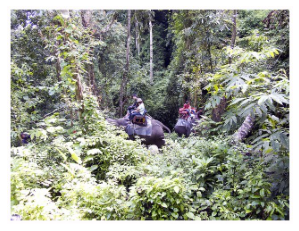

time: 5.4 s (started: 2021-05-25 17:40:02 +00:00)


In [ ]:
# Let's take a look at the data we have. To do it we need to load the dataset without augmentations.
dataset_train = A2Dataset("/content/COMP5329S1A2Dataset", "train")

# A simple function for visualization.
def show_sample(img, binary_img_labels):
    # Convert the binary labels back to the text representation.    
    try:
        plt.imshow(img)
    except:
        plt.imshow(img.reshape(256,256,-1))
    plt.axis('off')
    plt.show()

show_sample(dataset_train[2][0],dataset_train[2][1])

## Metrics Function

In [ ]:
# Use threshold to define predicted labels and invoke sklearn's metrics with different averaging strategies.
def calculate_metrics(pred, target, threshold=0.5):
    pred = np.array(pred > threshold, dtype=float)
    return {'micro/precision': precision_score(y_true=target, y_pred=pred, average='micro'),
            'micro/recall': recall_score(y_true=target, y_pred=pred, average='micro'),
            'micro/f1': f1_score(y_true=target, y_pred=pred, average='micro'),
            'macro/precision': precision_score(y_true=target, y_pred=pred, average='macro'),
            'macro/recall': recall_score(y_true=target, y_pred=pred, average='macro'),
            'macro/f1': f1_score(y_true=target, y_pred=pred, average='macro'),
            'samples/precision': precision_score(y_true=target, y_pred=pred, average='samples'),
            'samples/recall': recall_score(y_true=target, y_pred=pred, average='samples'),
            'samples/f1': f1_score(y_true=target, y_pred=pred, average='samples'),
            }

time: 6.9 ms (started: 2021-05-25 17:40:07 +00:00)


## Checkpoint

In [ ]:
# Here is an auxiliary function for checkpoint saving.
def checkpoint_save(model, save_path, epoch):
    f = os.path.join(save_path, 'checkpoint-{:06d}.pth'.format(epoch))
    if 'module' in dir(model):
        torch.save(model.module.state_dict(), f)
    else:
        torch.save(model.state_dict(), f)
    print('saved checkpoint:', f)

time: 3.18 ms (started: 2021-05-25 17:40:07 +00:00)


# Main Process

## Define Transform

In [ ]:
# define a transform
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Test preprocessing
val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
print(tuple(np.array(np.array(mean)*255).tolist()))

# Train preprocessing
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(),
    transforms.RandomAffine(degrees=20, translate=(0.2, 0.2), scale=(0.5, 1.5),
                            shear=None, resample=False, 
                            fillcolor=tuple(np.array(np.array(mean)*255).astype(int).tolist())),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

(123.675, 116.28, 103.53)
time: 10.3 ms (started: 2021-05-25 17:40:07 +00:00)


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1315: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1329: UserWarning: Argument fillcolor is deprecated and will be removed since v0.10.0. Please, use fill instead
  "Argument fillcolor is deprecated and will be removed since v0.10.0. Please, use fill instead"


## Define Hyperparameters

In [ ]:
# Initialize the training parameters.
num_workers =4 # Number of CPU processes for data preprocessing
lr = 1e-4 # Learning rate
batch_size = 32
save_freq = 1 # Save checkpoint frequency (epochs)
test_freq = 200 # Test model frequency (iterations)
max_epoch_number = 30#5 # Number of epochs for training 
# Note: on the small subset of data overfitting happens after 30-35 epochs

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

device = torch.device('cuda')
# Save path for checkpoints
save_path = 'chekpoints/'
# Save path for logs
logdir = 'logs/'

time: 3.44 ms (started: 2021-05-25 17:40:07 +00:00)


## Train

In [ ]:
# Initialize the dataloaders for training.
val_dataset = A2Dataset("/content/COMP5329S1A2Dataset", "val", val_transform)
train_dataset = A2Dataset("/content/COMP5329S1A2Dataset", "train", train_transform)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True,
                              drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers)

num_train_batches = int(np.ceil(len(train_dataset) / batch_size))

Loading val set with 6000 samples
Loading train set with 24000 samples
time: 6.21 s (started: 2021-05-25 17:40:07 +00:00)


In [ ]:
# Initialize the model
model = EffNet(len(train_dataset.classes))
# Switch model to the training mode and move it to GPU.
model.train()
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

os.makedirs(save_path, exist_ok=True)

# Loss function
criterion = nn.BCELoss()
# Tensoboard logger
logger = SummaryWriter(logdir)

# Run training
epoch = 0
iteration = 0
while True:
    batch_losses = []
    for imgs, _, targets in train_dataloader:
        imgs = imgs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()

        model_result = model(imgs)
        loss = criterion(model_result, targets.type(torch.float))

        batch_loss_value = loss.item()
        loss.backward()
        optimizer.step()

        logger.add_scalar('train_loss', batch_loss_value, iteration)
        batch_losses.append(batch_loss_value)
        with torch.no_grad():
            result = calculate_metrics(model_result.cpu().numpy(), targets.cpu().numpy())
            for metric in result:
                logger.add_scalar('train/' + metric, result[metric], iteration)

        if iteration % test_freq == 0:
            model.eval()
            with torch.no_grad():
                model_result = []
                targets = []
                for imgs, _, batch_targets in val_dataloader:
                    imgs = imgs.to(device)
                    model_batch_result = model(imgs)
                    model_result.extend(model_batch_result.cpu().numpy())
                    targets.extend(batch_targets.cpu().numpy())

            result = calculate_metrics(np.array(model_result), np.array(targets))
            for metric in result:
                logger.add_scalar('val/' + metric, result[metric], iteration)
            print("epoch:{:2d} iter:{:3d} val: "
                  "micro f1: {:.3f} "
                  "macro f1: {:.3f} "
                  "samples f1: {:.3f}".format(epoch, iteration,
                                              result['micro/f1'],
                                              result['macro/f1'],
                                              result['samples/f1']))

            model.train()
        iteration += 1

    loss_value = np.mean(batch_losses)
    print("epoch:{:2d} iter:{:3d} train: loss:{:.3f}".format(epoch, iteration, loss_value))
    if epoch % save_freq == 0:
        checkpoint_save(model, save_path, epoch)
    epoch += 1
    if max_epoch_number < epoch:
        break

Loaded pretrained weights for efficientnet-b4


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 0 iter:  0 val: micro f1: 0.149 macro f1: 0.118 samples f1: 0.139


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


epoch: 0 iter:200 val: micro f1: 0.605 macro f1: 0.073 samples f1: 0.640
epoch: 0 iter:400 val: micro f1: 0.698 macro f1: 0.303 samples f1: 0.705
epoch: 0 iter:600 val: micro f1: 0.738 macro f1: 0.440 samples f1: 0.751
epoch: 0 iter:750 train: loss:0.202
saved checkpoint: chekpoints/checkpoint-000000.pth
epoch: 1 iter:800 val: micro f1: 0.771 macro f1: 0.536 samples f1: 0.789
epoch: 1 iter:1000 val: micro f1: 0.791 macro f1: 0.623 samples f1: 0.818
epoch: 1 iter:1200 val: micro f1: 0.801 macro f1: 0.656 samples f1: 0.833
epoch: 1 iter:1400 val: micro f1: 0.812 macro f1: 0.666 samples f1: 0.839
epoch: 1 iter:1500 train: loss:0.109
saved checkpoint: chekpoints/checkpoint-000001.pth
epoch: 2 iter:1600 val: micro f1: 0.811 macro f1: 0.670 samples f1: 0.841
epoch: 2 iter:1800 val: micro f1: 0.823 macro f1: 0.707 samples f1: 0.852
epoch: 2 iter:2000 val: micro f1: 0.824 macro f1: 0.706 samples f1: 0.851
epoch: 2 iter:2200 val: micro f1: 0.825 macro f1: 0.721 samples f1: 0.851
epoch: 2 iter:2